In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jul  8 14:42:55 2021

@author: axelt

Based on https://www.youtube.com/watch?v=Oa_d-zaUti8
"""

#best library for audio processing
import librosa, librosa.display

import matplotlib.pyplot as plt
import numpy as np




shape of signal (675300,)


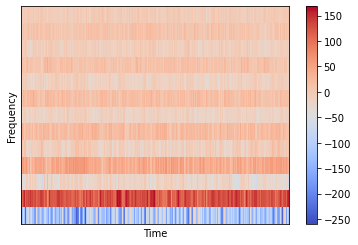

In [2]:
file = "blues.00000.wav"

#load the file into librosa.
#the sample rate determines the size and training time of the model
#signal: numpy array of samples #samples = signal rate * song length
#sr is just the sample rate we gave as input
signal, sr = librosa.load(file, sr=22500)

#many many samples
print ("shape of signal", signal.shape)

#librosa function to plot wave functions
"""
librosa.display.waveplot(signal,sr=sr)

plt.xlabel("Time")
plt.ylabel("Amplitude")
"""

#FFT to move from time domain to frequency domain
# returns as many values as the number of samples in the wave form
# values are complex numbers
fft=np.fft.fft(signal)

# magnitudes tell us the contribution of each frequency bin to the overall sound
#"The absolute value of a complex number , a+bi (also called the modulus ) 
#is defined as the distance between the origin (0,0) and the point (a,b) in 
#the complex plane."
magnitude=np.abs(fft)
#np.linspace() creates a specified number of equally sized intervals
#e.g np.linspace(1, 100, num=100, endpoint=True, retstep=False, dtype=None, axis=0)
# will return a hundred intervals between 1 and 100
frequency = np.linspace(0,sr,len(magnitude))

"""
plt.plot(frequency,magnitude)
plt.xlabel("Freiquency")
plt.ylabel("Magnitude")
"""

#as an artifact of FFT we get a symmetrical graph, we don't need both halves
#so we only look at the left side
left_frequency =frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(magnitude)/2)]

#now the graph is single-tailed
"""
plt.plot(left_frequency,left_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
"""

# STFT: short term fourier transform
#size of the window we consider (in our samples)
n_fft = 2048
#how much we move each time (through our samples)
hop_length=512

stft=librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)
#stft contains complex numbers
spectrogram = np.abs(stft)

#good for visualising spectrum-like data
librosa.display.specshow(spectrogram, sr=sr, hop_length = hop_length)
"""
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
"""
#there are bursts of energy at lower frequencies,  but mostly empty

#convert to decibels, makes it much more readable
log_spectrogram = librosa.amplitude_to_db(spectrogram)
"""
librosa.display.specshow(log_spectrogram, sr=sr, hop_length = hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
"""
#MFCCs: Mel Frequency Capstral Coefficients
#n_mfcc how many coefficents we want
# MFCCs start with an fft
MFCCs = librosa.feature.mfcc(signal, n_fft=n_fft,sr=sr, hop_length=hop_length, n_mfcc=13)

librosa.display.specshow(MFCCs, sr=sr, hop_length = hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()










#ideas what happens if we just fft and run it through a regular neural network?


In [3]:
# get data
# process data
# split data
# create network (ann + layers)
# select optimizer and loss function
# model.fit(x.train,y.train)
# model.evaluate(x.test,y.test)


import numpy as np
from sklearn.model_selection import train_test_split

#generate a dataset of numbers to be added together (x) and their sums per sample (y)
def generateDataset (numInputs, numSamples):
    x = np.array([[np.random.rand()/numInputs for i in range (0,numInputs)] for j in range (0, numSamples)])
    y = np.array([np.sum(i) for i in x])
    return x,y

x,y = generateDataset(2, 40000)

"""
print(x)
print (y)
"""

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

"""
print ("x_train", x_train)
print ("y_train", y_train)
print ("x_test",x_test)
print ("y_test",y_test)
"""

import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(5, input_dim=2, activation="sigmoid"),
    tf.keras.layers.Dense(10, input_dim=2, activation="sigmoid"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# choose optimiser (in this case, stochastic gradient descent)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

# compile model (with mean squared error loss)
model.compile(optimizer=optimizer, loss='mse')

# train model
model.fit(x_train, y_train, epochs=100)

# evaluate model on test set
print("\nEvaluation on the test set:")
model.evaluate(x_test,  y_test, verbose=1)

# get predictions
data = np.array([[0.1, 0.2], [0.2, 0.2]])
predictions = model.predict(data)

# print predictions
print("\nPredictions:")
for d, p in zip(data, predictions):
    print("{} + {} = {}".format(d[0], d[1], p[0]))

Epoch 1/100
875/875 [==============================] - 0s 244us/step - loss: 0.0428
Epoch 2/100
875/875 [==============================] - 0s 243us/step - loss: 0.0417
Epoch 3/100
875/875 [==============================] - 0s 244us/step - loss: 0.0414
Epoch 4/100
875/875 [==============================] - 0s 244us/step - loss: 0.0411
Epoch 5/100
875/875 [==============================] - 0s 241us/step - loss: 0.0408
Epoch 6/100
875/875 [==============================] - 0s 243us/step - loss: 0.0404
Epoch 7/100
875/875 [==============================] - 0s 244us/step - loss: 0.0398
Epoch 8/100
875/875 [==============================] - 0s 242us/step - loss: 0.0390
Epoch 9/100
875/875 [==============================] - 0s 241us/step - loss: 0.0378
Epoch 10/100
875/875 [==============================] - 0s 243us/step - loss: 0.0361
Epoch 11/100
875/875 [==============================] - 0s 253us/step - loss: 0.0334
Epoch 12/100
875/875 [==============================] - 0s 254us/step - lo

Epoch 94/100
875/875 [==============================] - 0s 244us/step - loss: 3.8455e-04
Epoch 95/100
875/875 [==============================] - 0s 248us/step - loss: 3.8439e-04
Epoch 96/100
875/875 [==============================] - 0s 248us/step - loss: 3.8417e-04
Epoch 97/100
875/875 [==============================] - 0s 242us/step - loss: 3.8397e-04
Epoch 98/100
875/875 [==============================] - 0s 248us/step - loss: 3.8369e-04
Epoch 99/100
875/875 [==============================] - 0s 251us/step - loss: 3.8347e-04
Epoch 100/100
875/875 [==============================] - 0s 247us/step - loss: 3.8341e-04

Evaluation on the test set:
375/375 [==============================] - 0s 232us/step - loss: 3.8005e-04

Predictions:
0.1 + 0.2 = 0.28527817130088806
0.2 + 0.2 = 0.3855587840080261
